TEST: [0]
11886.604613476937
0.7840502243213697


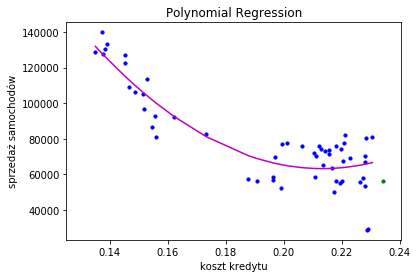

TEST: [1]
11880.873100247169
0.7834630542581233


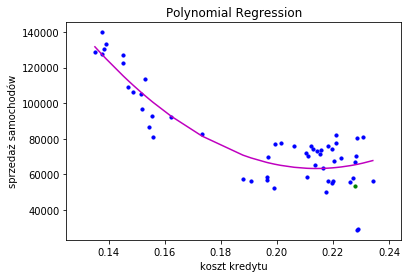

TEST: [2]
11924.100391203441
0.7825580713542432


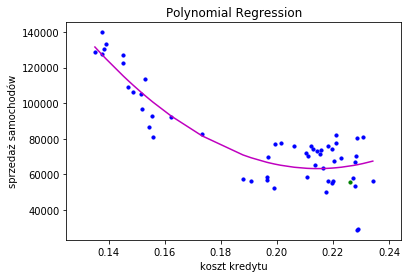

TEST: [3]
11939.279498100255
0.7820442066008971


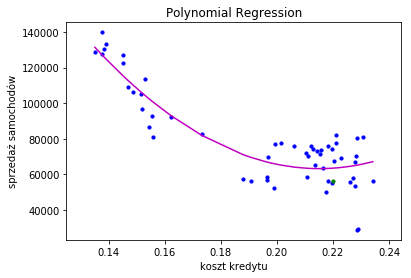

TEST: [4]
11921.903069110325
0.783290051297527


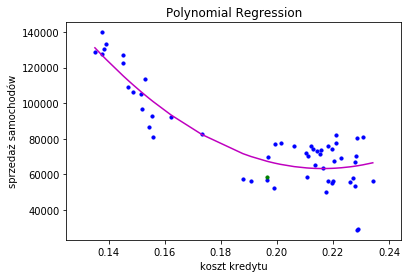

TEST: [5]
11823.093329830916
0.7865687452284633


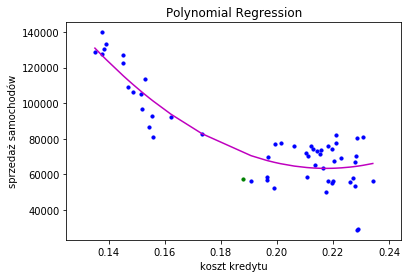

TEST: [6]
11840.744254669531
0.7857125386987411


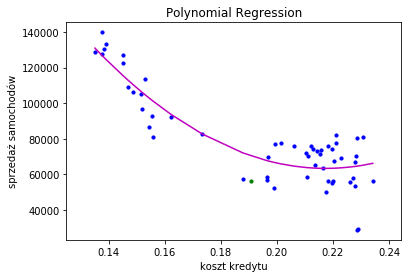

TEST: [7]
11901.77641549187
0.7836536718691447


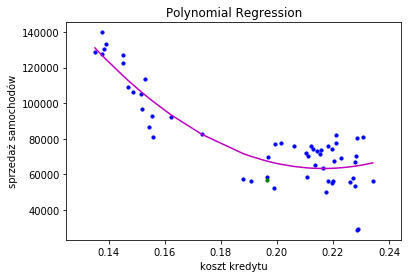

TEST: [8]
11890.216833614204
0.7867399688337315


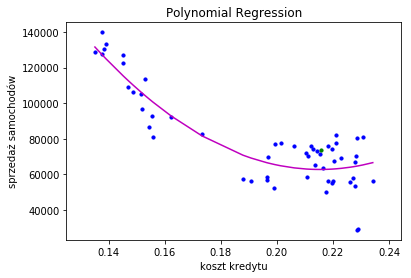

TEST: [9]
11941.47669618626
0.7846142209976138


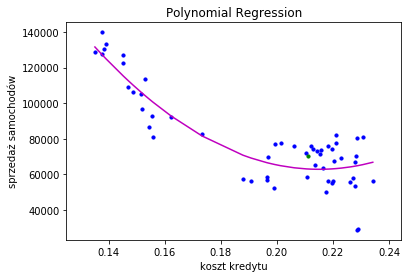

TEST: [10]
11899.037294242407
0.7863905541266153


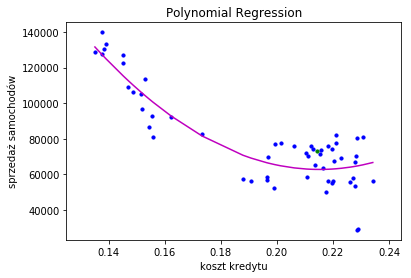

TEST: [11]
11856.29656202807
0.788044986428355


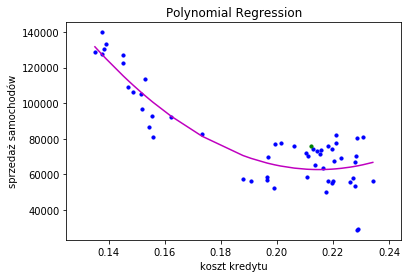

TEST: [12]
11974.853164450207
0.7827969219007445


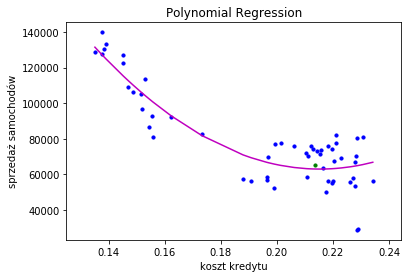

TEST: [13]
11694.18346083847
0.7937686168726648


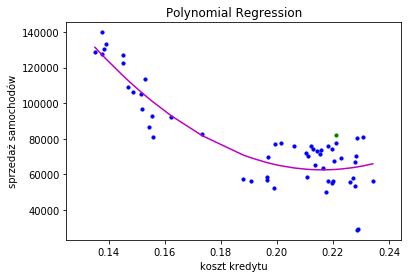

TEST: [14]
11775.932023566744
0.7909332940638323


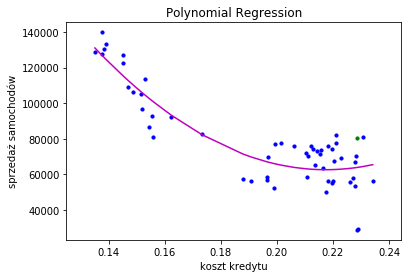

TEST: [15]
11779.858916654153
0.790784603793812


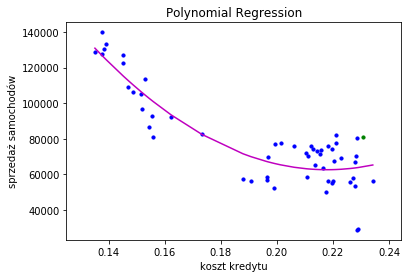

TEST: [16]
10894.353571592239
0.8080921271490777


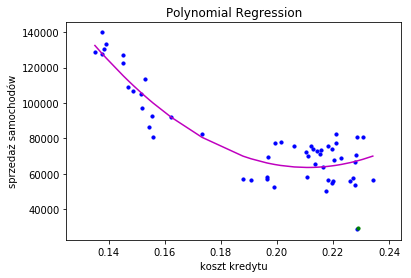

TEST: [17]
10867.169528929322
0.8087121337601071


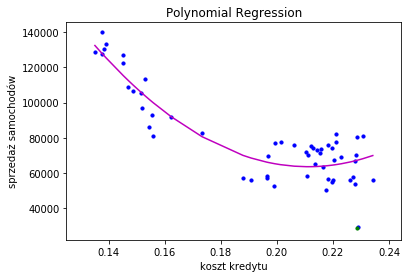

TEST: [18]
11952.5033381356
0.7842532062415449


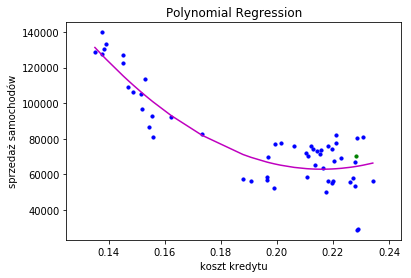

TEST: [19]
11883.86323961381
0.7869985420910943


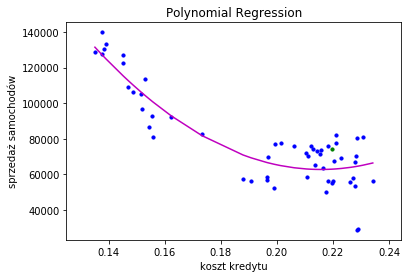

TEST: [20]
11945.36075050348
0.7819327044438238


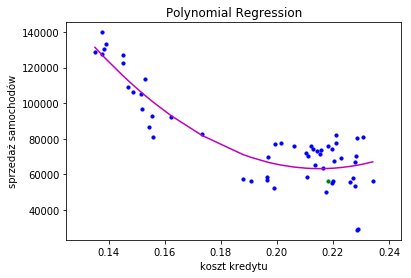

TEST: [21]
11925.200134776569
0.782210865543785


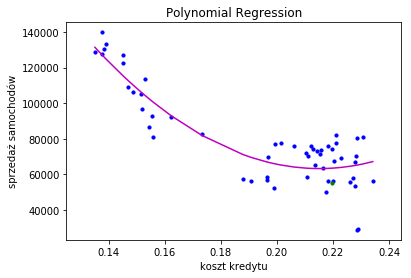

TEST: [22]
11851.444526001982
0.7834301005880925


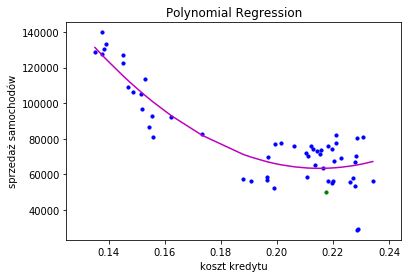

TEST: [23]
11961.68984147702
0.7818503628969555


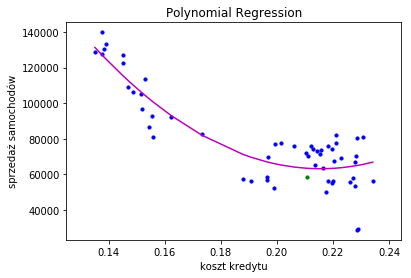

TEST: [24]
11964.909662413043
0.7834696332897029


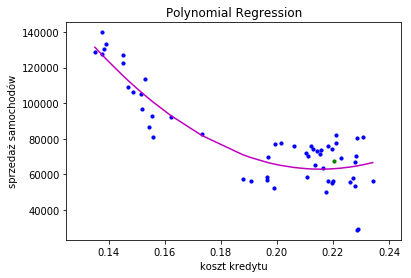

TEST: [25]
11954.989768533029
0.7840254805021605


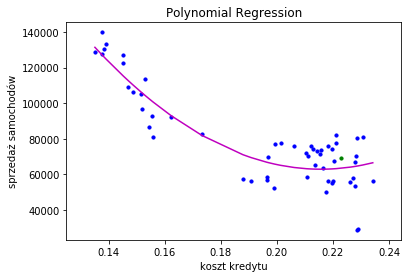

TEST: [26]
11979.204821990024
0.782322170027918


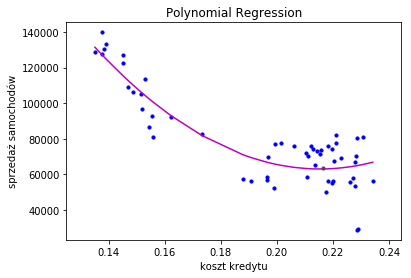

TEST: [27]
11883.301829356085
0.7870130557203557


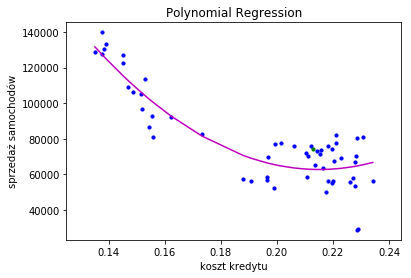

TEST: [28]
11820.047235432376
0.7893836704499035


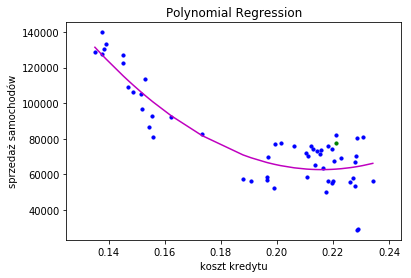

TEST: [29]
11926.621619765636
0.7852520939299463


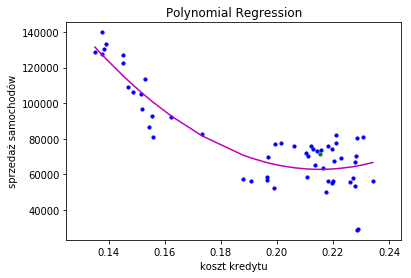

TEST: [30]
11941.918286499522
0.7823781152144927


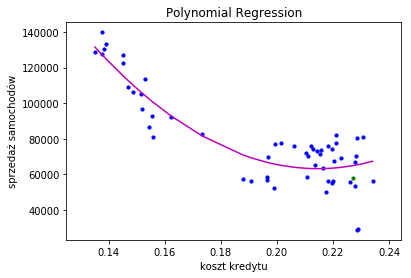

TEST: [31]
11976.227373927799
0.7829336761222991


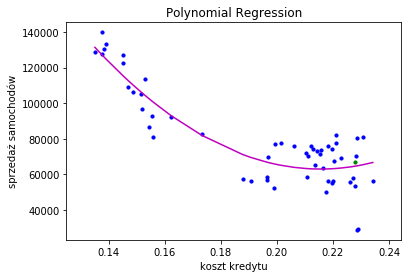

TEST: [32]
11850.745073267197
0.7882521538834675


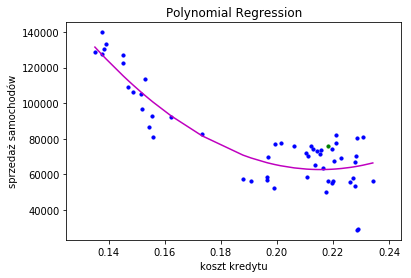

TEST: [33]
11918.27674792108
0.7856227956546382


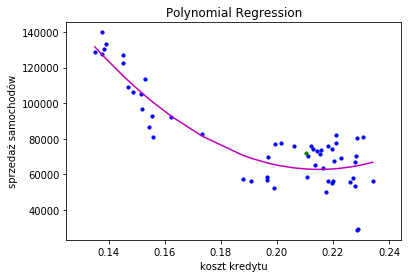

TEST: [34]
11866.707909314933
0.7876784352937061


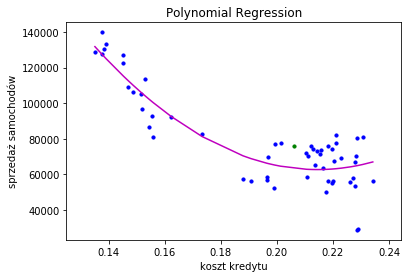

TEST: [35]
11874.077682136765
0.7874481008696027


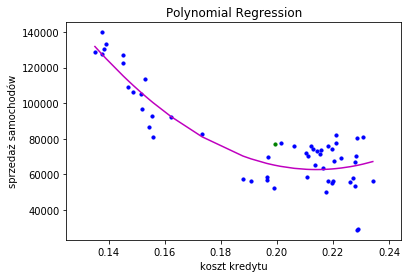

TEST: [36]
11836.89272871786
0.7847123402780449


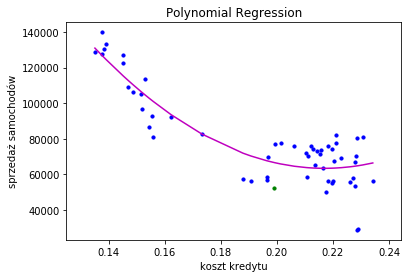

TEST: [37]
11850.08030368998
0.7883142952986272


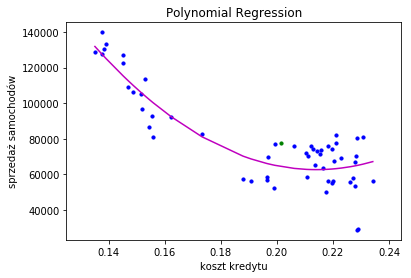

TEST: [38]
11972.485779300709
0.7834276499215227


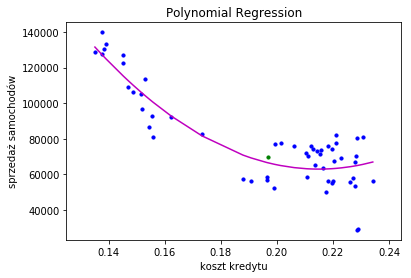

TEST: [39]
11979.046962040542
0.7835911399218954


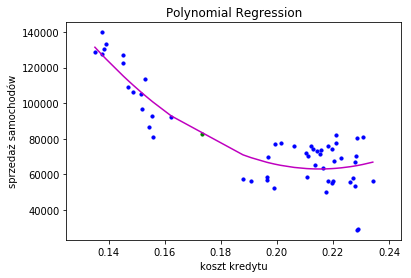

TEST: [40]
11978.969949594679
0.7825759761290141


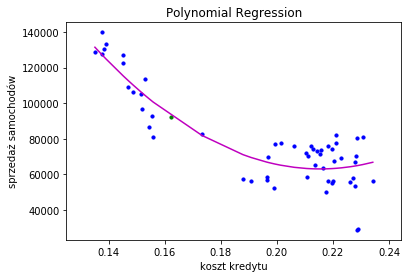

TEST: [41]
11775.081057399322
0.7906295374979599


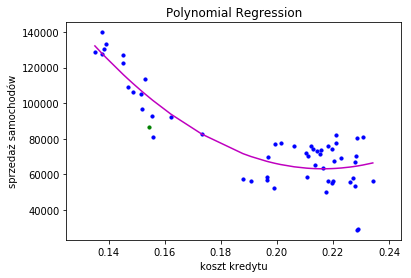

TEST: [42]
11664.547706129051
0.7948652901084722


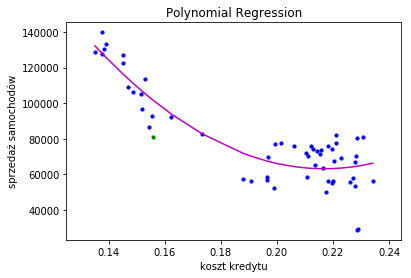

TEST: [43]
11919.471893264472
0.783784002122982


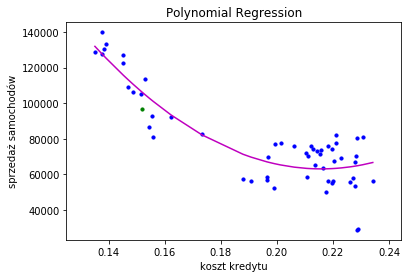

TEST: [44]
11978.756794320907
0.7793165835983455


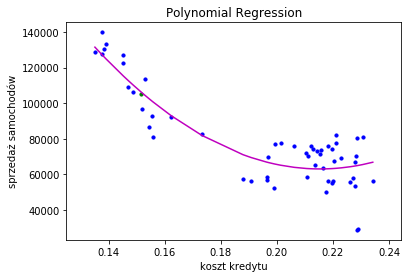

TEST: [45]
11968.361226510367
0.779270678153857


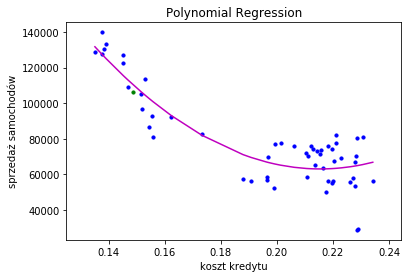

TEST: [46]
11927.15973109986
0.7843278010957754


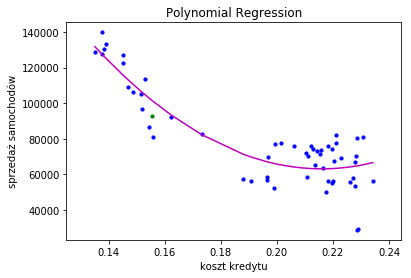

TEST: [47]
11914.02773592842
0.7784910310077287


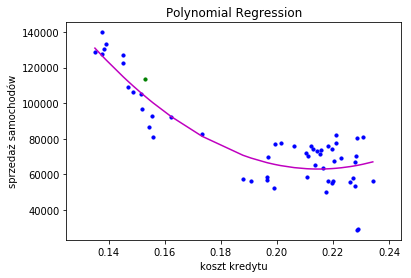

TEST: [48]
11865.885557546428
0.7728230882732279


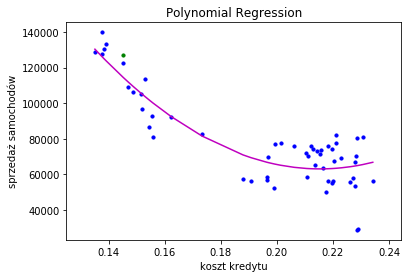

TEST: [49]
11935.765861659664
0.7729462109117292


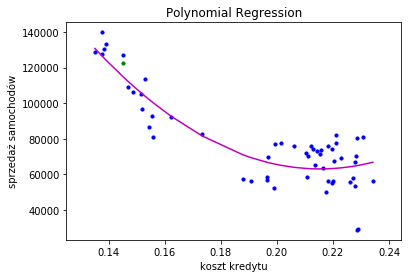

TEST: [50]
11966.985302724803
0.7783929911371741


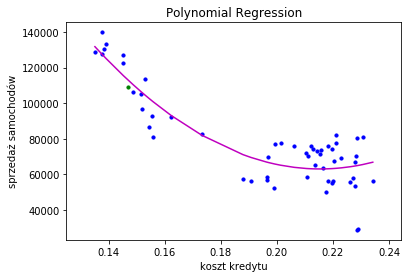

TEST: [51]
11979.241893513275
0.7681185777781032


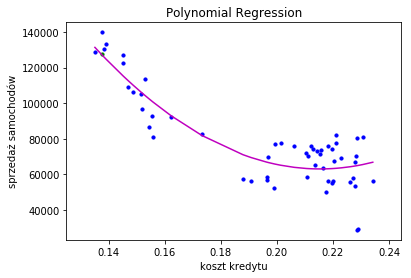

TEST: [52]
11845.184308602276
0.7637015498984872


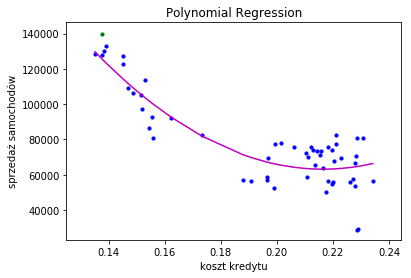

TEST: [53]
11920.152298752908
0.7663783876877944


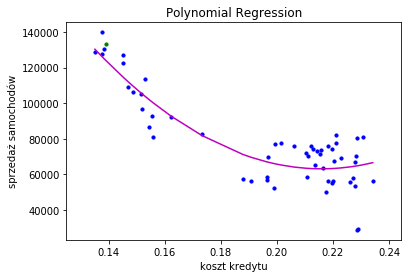

TEST: [54]
11963.236056915091
0.7668459366628733


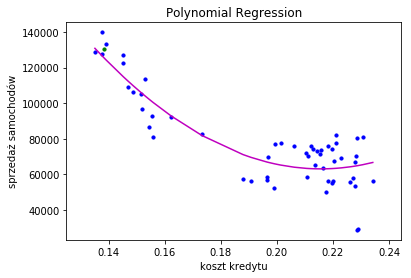

TEST: [55]
11972.068835779717
0.7677495833172728


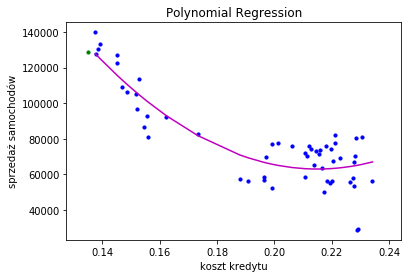

In [2]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
X = np.array([[0.2342],[0.2279],[0.2262],[0.2201],[0.1963],[0.1879],[0.1908],[0.1965],[0.2158],[0.2112],[0.2144],[0.2121],
                  [0.2137],[0.2212],[0.2285],[0.2306],[0.2291],[0.2287],[0.2281],[0.2197],[0.2182],[0.2195],[0.2174],[0.2108],
                  [0.2205],[0.2230],[0.2166],[0.2129],[0.2210],[0.2155],[0.2273],[0.2279],[0.2181],[0.2105],[0.2062],[0.1993],
                  [0.1991],[0.2013],[0.1970],[0.1733],[0.1623],[0.1545],[0.1559],[0.1520],[0.1516],[0.1487],[0.1556],[0.1529],
                  [0.1452],[0.1452],[0.1468],[0.1377],[0.1375],[0.1391],[0.1384],[0.1351]])
y = np.array([56405,53648,55942,56086,58426,57231,56402,56984,73694,70154,73158,75642,65473,82351,80654,
   81004,29313,28720,70526,74256,56488,54867,50274,58463,67610,69213,63622,74148,77577,71236,
   57697,66701,75906,72085,75816,77176,52522,77795,69525,82517,92108,86412,80826,96991,105236,
   106486,92850,113486,127098,122628,109003,127606,139885,133160,130298,128546])
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    polynomial_features= PolynomialFeatures(degree=2)
    X_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly, y_train)
    y_poly_pred = model.predict(X_poly)

    rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
    r2 = r2_score(y_train,y_poly_pred)
    print(rmse)
    print(r2)
    plt.scatter(X_train, y_train, s=10,color='b')
    plt.scatter(X_test, y_test, s=10,color='g')
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
    X_train, y_poly_pred = zip(*sorted_zip)
    plt.plot(X_train, y_poly_pred, color='m')
    plt.title('Polynomial Regression') 
    plt.xlabel('koszt kredytu')
    plt.ylabel('sprzedaż samochodów')
    plt.show()